In [1]:
import pandas as pd
import sys
!{sys.executable} -m pip install pandas-profiling
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as pp
import seaborn as sns

In [2]:
df = pd.read_csv('Loan_data.csv', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42536 entries, 0 to 42535
Columns: 151 entries, id to settlement_term
dtypes: float64(120), object(31)
memory usage: 49.0+ MB


In [4]:
# Utworzenie raportu o danych z pliku Loan_data.csv w celu wstępnej analizy danych.

In [5]:
# Przeglądając raport widać, że duża część kolumn zawiera mniej niż połowę danych, zdecydowałam by je usunąć aby raport stał się bardziej czytelny oraz żeby przyspieszyć wykonywanie operacji na danych.

In [6]:
df1 = df.drop(['member_id',
'mths_since_last_delinq',
'mths_since_last_record',
'next_pymnt_d',
'mths_since_last_major_derog',
'annual_inc_joint',
'dti_joint',
'verification_status_joint',
'tot_coll_amt',
'tot_cur_bal',
'open_acc_6m',
'open_act_il',
'open_il_12m',
'open_il_24m',
'mths_since_rcnt_il',
'total_bal_il',
'il_util',
'open_rv_12m',
'open_rv_24m',
'max_bal_bc',
'all_util',
'total_rev_hi_lim',
'inq_fi',
'total_cu_tl',
'inq_last_12m',
'acc_open_past_24mths',
'avg_cur_bal',
'bc_open_to_buy',
'bc_util',
'mo_sin_old_il_acct',
'mo_sin_old_rev_tl_op',
'mo_sin_rcnt_rev_tl_op',
'mo_sin_rcnt_tl',
'mort_acc',
'mths_since_recent_bc',
'mths_since_recent_bc_dlq',
'mths_since_recent_inq',
'mths_since_recent_revol_delinq',
'member_id',
'mths_since_last_delinq',
'mths_since_last_record',
'next_pymnt_d',
'mths_since_last_major_derog',
'annual_inc_joint',
'dti_joint',
'verification_status_joint',
'tot_coll_amt',
'tot_cur_bal',
'open_acc_6m',
'open_act_il',
'open_il_12m',
'open_il_24m',
'mths_since_rcnt_il',
'total_bal_il',
'il_util',
'open_rv_12m',
'open_rv_24m',
'max_bal_bc',
'all_util',
'total_rev_hi_lim',
'inq_fi',
'total_cu_tl',
'inq_last_12m',
'acc_open_past_24mths',
'avg_cur_bal',
'bc_open_to_buy',
'bc_util',
'mo_sin_old_il_acct',
'mo_sin_old_rev_tl_op',
'mo_sin_rcnt_rev_tl_op',
'mo_sin_rcnt_tl',
'mort_acc',
'mths_since_recent_bc',
'mths_since_recent_bc_dlq',
'mths_since_recent_inq',
'mths_since_recent_revol_delinq',
'num_accts_ever_120_pd',
'num_actv_bc_tl',
'num_actv_rev_tl',
'num_bc_sats',
'num_bc_tl',
'num_il_tl',
'num_op_rev_tl',
'num_rev_accts',
'num_rev_tl_bal_gt_0',
'num_sats',
'num_tl_120dpd_2m',
'num_tl_30dpd',
'num_tl_90g_dpd_24m',
'num_tl_op_past_12m',
'pct_tl_nvr_dlq',
'percent_bc_gt_75',
'pub_rec_bankruptcies',
'tot_hi_cred_lim',
'total_bal_ex_mort',
'total_bc_limit',
'total_il_high_credit_limit',
'revol_bal_joint',
'sec_app_fico_range_low',
'sec_app_fico_range_high',
'sec_app_earliest_cr_line',
'sec_app_inq_last_6mths',
'sec_app_mort_acc',
'sec_app_open_acc',
'sec_app_revol_util',
'sec_app_open_act_il',
'sec_app_num_rev_accts',
'sec_app_chargeoff_within_12_mths',
'sec_app_collections_12_mths_ex_med',
'sec_app_mths_since_last_major_derog',
'hardship_type',
'hardship_reason',
'hardship_status',
'deferral_term',
'hardship_amount',
'hardship_start_date',
'hardship_end_date',
'payment_plan_start_date',
'hardship_length',
'hardship_dpd',
'hardship_loan_status',
'orig_projected_additional_accrued_interest',
'hardship_payoff_balance_amount',
'hardship_last_payment_amount',
'debt_settlement_flag_date',
'settlement_status',
'settlement_date',
'settlement_amount',
'settlement_percentage',
'settlement_term'], axis=1)

In [7]:
# Wczytanie słownika i usunięcie pustych kolumn. Ze słownika będę korzystać w celu analizy poszczególnych kolumnych z data frame.
dictionary = pd.read_csv('LCDataDictionary.csv')
dictionary_frame = pd.DataFrame(dictionary)
dictionary_frame.dropna(how='all', axis=1, inplace=True)

In [8]:
# W df pozostało 59 kolumn ze 151. Moim zadaniem jest utworzenie modelu klasyfikacynjego, który będzie przewidywał czy  czy potencjalny pożyczkobiorca
# spłaci swój dług z tytułu zaciągniętej pożyczki. Przeanalizuję teraz po kolei znaczenie danych z  każdej kolumny.

In [9]:
df1.iloc[:6, 0:10]

id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0  1077501     5000.0       5000.0           4975.0   36 months   10.65%   
1  1077430     2500.0       2500.0           2500.0   60 months   15.27%   
2  1077175     2400.0       2400.0           2400.0   36 months   15.96%   
3  1076863    10000.0      10000.0          10000.0   36 months   13.49%   
4  1075358     3000.0       3000.0           3000.0   60 months   12.69%   
5  1075269     5000.0       5000.0           5000.0   36 months    7.90%   

   installment grade sub_grade                 emp_title  
0       162.87     B        B2                       NaN  
1        59.83     C        C4                     Ryder  
2        84.33     C        C5                       NaN  
3       339.31     C        C1       AIR RESOURCES BOARD  
4        67.79     B        B5  University Medical Group  
5       156.46     A        A4      Veolia Transportaton

In [10]:
dictionary_frame.loc[dictionary_frame['LoanStatNew'] == 'id']

LoanStatNew                                    Description
27          id  A unique LC assigned ID for the loan listing.

In [11]:
# 1 Kolumna 'id' zawiera numer przypisany do pożyczki. Numer nie będzie miał wpływu na to czy pożyczka zostanie spłacona. DO USUNIĘCIA

In [12]:
dictionary_frame.loc[dictionary_frame['LoanStatNew'] == 'loan_amnt']

LoanStatNew                                        Description
41   loan_amnt  The listed amount of the loan applied for by t...

In [13]:
# 2 Kolumna 'loan_amnt' to kwota, o którą ubiega się pożyczkobiorca. Kwota osataecznej pożyczki może być różna od tej wartości, dlaego nie będę uwzględniać jej w modelu. DO USUNIĘCIA

In [14]:
dictionary_frame.loc[dictionary_frame['LoanStatNew'] == 'funded_amnt']

LoanStatNew                                        Description
23  funded_amnt  The total amount committed to that loan at tha...

In [15]:
# 3 Kolumna 'funded_amnt' zawiera kwotę zadeklarowaną do pożyczenia w danym czasie.

In [16]:
dictionary_frame.loc[dictionary_frame['LoanStatNew'] == 'funded_amnt_inv']

LoanStatNew                                        Description
24  funded_amnt_inv  The total amount committed by investors for th...

In [17]:
# 4 Kolumna 'funded_amnt_inv' zawiera kwotę zadeklarowaną do pożyczenia przez inwestorów w danym czasie.

In [18]:
dictionary_frame.loc[dictionary_frame['LoanStatNew'] == 'term']

LoanStatNew                                        Description
94        term  The number of payments on the loan. Values are...

In [19]:
# 5 Kolumna 'term' zawiera liczbę rat podaną w miesiącach

In [20]:
dictionary_frame.loc[dictionary_frame['LoanStatNew'] == 'int_rate']

LoanStatNew                Description
34    int_rate  Interest Rate on the loan

In [21]:
# 6 Kolumna 'int_rate' zawiera stawkę odsetek

In [22]:
dictionary_frame.loc[dictionary_frame['LoanStatNew'] == 'installment']

LoanStatNew                                        Description
33  installment  The monthly payment owed by the borrower if th...

In [23]:
# 7 Kolumna 'installment' zawiera kwotę miesięcznej raty.

In [24]:
dictionary_frame.loc[dictionary_frame['LoanStatNew'] == 'grade']

LoanStatNew             Description
25       grade  LC assigned loan grade

In [25]:
# 8 Kolumna 'grade' klasyfikacja kredytu od A do C
# Lending Club używa oceny pożyczkobiorcy i terminu płatności do oszacowania stóp procentowych. Powoduje to wahania stóp procentowych w ramach klasy.
# Wskaźnikiem, który segmentuje pożyczkobiorców na podstawie zachowań jest 'grade'

In [26]:
dictionary_frame.loc[dictionary_frame['LoanStatNew'] == 'sub_grade']

LoanStatNew                Description
92   sub_grade  LC assigned loan subgrade

In [27]:
df.groupby(by=['sub_grade']).count()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
sub_grade                                                                   
A1         1142          0       1142         1142             1142  1142   
A2         1520          0       1520         1520             1520  1520   
A3         1823          0       1823         1823             1823  1823   
A4         2905          0       2905         2905             2905  2905   
A5         2793          0       2793         2793             2793  2793   
B1         1882          0       1882         1882             1882  1882   
B2         2113          0       2113         2113             2113  2113   
B3         2997          0       2997         2997             2997  2997   
B4         2590          0       2590         2590             2590  2590   
B5         2807          0       2807         2807             2807  2807   
C1         2264          0       2264         2264             2264  2264   
C2         2157          0       2157         2157             2157  2157   
C3         1658          0       1658         1658             1658  1658   
C4         1370          0       1370         1370             1370  1370   
C5         1291          0       1291         1291             1291  1291   
D1         1053          0       1053         1053             1053  1053   
D2         1485          0       1485         1485             1485  1485   
D3         1322          0       1322         1322             1322  1322   
D4         1140          0       1140         1140             1140  1140   
D5         1016          0       1016         1016             1016  1016   
E1          884          0        884          884              884   884   
E2          791          0        791          791              791   791   
E3          668          0        668          668              668   668   
E4          552          0        552          552              552   552   
E5          499          0        499          499              499   499   
F1          392          0        392          392              392   392   
F2          308          0        308          308              308   308   
F3          236          0        236          236              236   236   
F4          211          0        211          211              211   211   
F5          154          0        154          154              154   154   
G1          141          0        141          141              141   141   
G2          107          0        107          107              107   107   
G3           79          0         79           79               79    79   
G4           99          0         99           99               99    99   
G5           86          0         86           86               86    86   

           int_rate  installment  grade  emp_title  ...  \
sub_grade                                           ...   
A1             1142         1142   1142       1020  ...   
A2             1520         1520   1520       1394  ...   
A3             1823         1823   1823       1681  ...   
A4             2905         2905   2905       2720  ...   
A5             2793         2793   2793       2587  ...   
B1             1882         1882   1882       1741  ...   
B2             2113         2113   2113       1972  ...   
B3             2997         2997   2997       2785  ...   
B4             2590         2590   2590       2442  ...   
B5             2807         2807   2807       2668  ...   
C1             2264         2264   2264       2122  ...   
C2             2157         2157   2157       2057  ...   
C3             1658         1658   1658       1574  ...   
C4             1370         1370   1370       1292  ...   
C5             1291         1291   1291       1215  ...   
D1             1053         1053   1053        998  ...   
D2             1485         1485   1485       1406  ...   
D3             1322         1322   1322   

In [28]:
# 9 Kolumna 'sub_grade' klasyfikacja kredytu od A1 do G5

In [29]:
dictionary_frame.loc[dictionary_frame['LoanStatNew'] == 'emp_title']

LoanStatNew                                        Description
20   emp_title  The job title supplied by the Borrower when ap...

In [30]:
# 10 Kolumna 'emp_title' zawiera stanowisko pożyczkobiorcy

In [31]:
df1.iloc[:10, 10:20]

emp_length home_ownership  annual_inc verification_status   issue_d  \
0  10+ years           RENT     24000.0            Verified  Dec-2011   
1   < 1 year           RENT     30000.0     Source Verified  Dec-2011   
2  10+ years           RENT     12252.0        Not Verified  Dec-2011   
3  10+ years           RENT     49200.0     Source Verified  Dec-2011   
4     1 year           RENT     80000.0     Source Verified  Dec-2011   
5    3 years           RENT     36000.0     Source Verified  Dec-2011   
6    8 years           RENT     47004.0        Not Verified  Dec-2011   
7    9 years           RENT     48000.0     Source Verified  Dec-2011   
8    4 years            OWN     40000.0     Source Verified  Dec-2011   
9   < 1 year           RENT     15000.0            Verified  Dec-2011   

   loan_status pymnt_plan                                                url  \
0   Fully Paid          n  https://lendingclub.com/browse/loanDetail.acti...   
1  Charged Off          n  https://lendingclub.com/browse/loanDetail.acti...   
2   Fully Paid          n  https://lendingclub.com/browse/loanDetail.acti...   
3   Fully Paid          n  https://lendingclub.com/browse/loanDetail.acti...   
4   Fully Paid          n  https://lendingclub.com/browse/loanDetail.acti...   
5   Fully Paid          n  https://lendingclub.com/browse/loanDetail.acti...   
6   Fully Paid          n  https://lendingclub.com/browse/loanDetail.acti...   
7   Fully Paid          n  https://lendingclub.com/browse/loanDetail.acti...   
8  Charged Off          n  https://lendingclub.com/browse/loanDetail.acti...   
9  Charged Off          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc             purpose  
0    Borrower added on 12/22/11 > I need to upgra...         credit_card  
1    Borrower added on 12/22/11 > I plan to use t...                 car  
2                                                NaN      small_business  
3    Borrower added on 12/21/11 > to pay for prop...               other  
4    Borrower added on 12/21/11 > I plan on combi...               other  
5                                                NaN             wedding  
6    Borrower added on 12/18/11 > I am planning o...  debt_consolidation  
7    Borrower added on 12/16/11 > Downpayment for...                 car  
8    Borrower added on 12/21/11 > I own a small h...      small_business  
9    Borrower added on 12/16/11 > I'm trying to b...               other

In [32]:
dictionary_frame.loc[dictionary_frame['LoanStatNew'] == 'emp_length']

LoanStatNew                                        Description
19  emp_length  Employment length in years. Possible values ar...

In [33]:
# 11 Kolumna 'emp_length' zawiera długość zatrudnienia pożyczkobiorcy w latach

In [34]:
dictionary_frame.loc[dictionary_frame['LoanStatNew'] == 'home_ownership']

LoanStatNew                                        Description
26  home_ownership  The home ownership status provided by the borr...

In [35]:
# 12 Kolumna 'home_ownership' zawiera status mieszkaniowy pożyczkobiorcy

In [36]:
dictionary_frame.loc[dictionary_frame['LoanStatNew'] == 'annual_income']

Empty DataFrame
Columns: [LoanStatNew, Description]
Index: []

In [37]:
# 13 Kolumna 'annual_icome' zawiera roczny przychód pożyczkobiorcy

In [38]:
dictionary_frame.loc[dictionary_frame['LoanStatNew'] == 'verification_status']

LoanStatNew                                        Description
112  verification_status  Indicates if income was verified by LC, not ve...

In [39]:
# 14 Kolumna 'verification status' oznacza czy przychód został zweryfikowany. Są to dane, które nie będą znane w momencie pozyskania nowego potencjalnego kredytobiorcy, nie będę ich brać pod uwagę w modelu. DO USUNIĘCIA

In [40]:
dictionary_frame.loc[dictionary_frame['LoanStatNew'] == 'issue_d']

LoanStatNew                          Description
35     issue_d  The month which the loan was funded

In [41]:
# 15 Kolumna 'issue_d' wskazuje miesiąc przyznania pożyczki. Zakładam, że nie ma to wpływu na spłatę kredyt - kolumna DO USUNIĘCIA

In [42]:
dictionary_frame.loc[dictionary_frame['LoanStatNew'] == 'loan_status']

LoanStatNew                 Description
42  loan_status  Current status of the loan

In [43]:
# 16 Kolumna 'loan_status' zawiera aktualne informacje o spłacie pożyczki. Na jej podstawie będę budować model.

In [44]:
dictionary_frame.loc[dictionary_frame['LoanStatNew'] == 'pmnt_plan']

Empty DataFrame
Columns: [LoanStatNew, Description]
Index: []

In [45]:
# 17 Kolumna 'pmnt_plan' zawiera same wartości 'n' DO USUNIĘCIA

In [46]:
dictionary_frame.loc[dictionary_frame['LoanStatNew'] == 'url']

LoanStatNew                             Description
111         url  URL for the LC page with listing data.

In [47]:
# 18 Kolumna 'url' zawiera wartości adresy internetowe. Ten typ danych nie nadaje się do zbudowania modelu. DO USUNIĘCIA

In [48]:
dictionary_frame.loc[dictionary_frame['LoanStatNew'] == 'desc']

LoanStatNew                                Description
15        desc  Loan description provided by the borrower

In [49]:
# 19 Kolumna 'desc' zawiera opis przeznaczenia kredytu. Są to dane w formie, która nie pozwala na zbudowanie modelu. DO USUNIĘCIA

In [50]:
dictionary_frame.loc[dictionary_frame['LoanStatNew'] == 'purpose']

LoanStatNew                                        Description
87     purpose  A category provided by the borrower for the lo...

In [51]:
# 20 Kolumna 'purpose' zawiera informacje o przeznaczeniu kredytu


In [52]:
df1.iloc[:10, 20:31]

title zip_code addr_state    dti  \
0                               Computer    860xx         AZ  27.65   
1                                   bike    309xx         GA   1.00   
2                   real estate business    606xx         IL   8.72   
3                               personel    917xx         CA  20.00   
4                               Personal    972xx         OR  17.94   
5  My wedding loan I promise to pay back    852xx         AZ  11.20   
6                                   Loan    280xx         NC  23.51   
7                        Car Downpayment    900xx         CA   5.35   
8   Expand Business & Buy Debt Portfolio    958xx         CA   5.55   
9            Building my credit history.    774xx         TX  18.08   

   delinq_2yrs earliest_cr_line  fico_range_low  fico_range_high  \
0          0.0         Jan-1985           735.0            739.0   
1          0.0         Apr-1999           740.0            744.0   
2          0.0         Nov-2001           735.0            739.0   
3          0.0         Feb-1996           690.0            694.0   
4          0.0         Jan-1996           695.0            699.0   
5          0.0         Nov-2004           730.0            734.0   
6          0.0         Jul-2005           690.0            694.0   
7          0.0         Jan-2007           660.0            664.0   
8          0.0         Apr-2004           675.0            679.0   
9          0.0         Sep-2004           725.0            729.0   

   inq_last_6mths  open_acc  pub_rec  
0             1.0       3.0      0.0  
1             5.0       3.0      0.0  
2             2.0       2.0      0.0  
3             1.0      10.0      0.0  
4             0.0      15.0      0.0  
5             3.0       9.0      0.0  
6             1.0       7.0      0.0  
7             2.0       4.0      0.0  
8             2.0      11.0      0.0  
9             0.0       2.0      0.0

In [53]:
# 21 Kolumna 'title' zawiera konkretne przeznaczenie kredytu.
# 22 Kolumna 'zip_code' jest zbędna ponieważ informacja o miejscu zamieszkania jest podana w kolumnie addr_state. DO USUNIĘCIA
# 23 Kolumna 'addr_state' zawiera oznaczemnie stanu.

In [54]:
dictionary_frame.loc[dictionary_frame['LoanStatNew'] == 'dti']

LoanStatNew                                        Description
16         dti  A ratio calculated using the borrower’s total ...

In [55]:
# 24 Kolumnq 'dti' zwiera współczynnik policzony poprzez podzielenie raty kredytu przez miesięczny dochód pożyczkobiorcy. Im większy współczynnik tym mniej środków zostaje miesięcznie do dyspozycji pożyczkobiorcy. Mozna założyć, że imn mniejszy współczynnik tym łatwiej pożyczkobiorcy spłacać raty kredytu.

In [56]:
dictionary_frame.loc[dictionary_frame['LoanStatNew'] == 'delinq_2yrs']

LoanStatNew                                        Description
13  delinq_2yrs  The number of 30+ days past-due incidences of ...

In [57]:
# 25 Kolumna 'delinq_2yrs' zawiera liczbę przypadków przeterminowania ponad 30 dni w aktach kredytowych pożyczkobiorcy z ostatnich 2 lat

In [58]:
dictionary_frame.loc[dictionary_frame['LoanStatNew'] == 'earliest_cr_line']

LoanStatNew                                        Description
18  earliest_cr_line  The month the borrower's earliest reported cre...

In [59]:
dictionary_frame.loc[dictionary_frame['LoanStatNew'] == 'fico_range_low']


LoanStatNew                                        Description
22  fico_range_low  The lower boundary range the borrower’s FICO a...

In [60]:
# 26, 27 Kolumna 'fico_range_low' i ,fico_range_high' zawiera zakres wskażnika FICO. Im wyższy wskażnik tym lepsza ocena kredytowa.

In [61]:
dictionary_frame.loc[dictionary_frame['LoanStatNew'] == 'inq_last_6mths']


LoanStatNew                                        Description
32  inq_last_6mths  The number of inquiries in past 6 months (excl...

In [62]:
# 28 Koluma 'inq_last_6mths' to liczba zapytań w ciągu ostatnich 6 miesięcy (z wyłączeniem zapytań o auto i hipotekę)

In [63]:
dictionary_frame.loc[dictionary_frame['LoanStatNew'] == 'open_acc']


LoanStatNew                                        Description
73    open_acc  The number of open credit lines in the borrowe...

In [64]:
# 29 Kolumna 'open_acc' zawiera liczbę otwartych linii kredytobiorcy

In [65]:
dictionary_frame.loc[dictionary_frame['LoanStatNew'] == 'pub_rec']


LoanStatNew                          Description
85     pub_rec  Number of derogatory public records

In [66]:
# 30 Kolumna 'pub_rec' zawiera kwotę całkowitego salda kredytu odnawialnego.

In [67]:
df1.iloc[:10, 31:42]


revol_bal revol_util  total_acc initial_list_status  out_prncp  \
0    13648.0      83.7%        9.0                   f        0.0   
1     1687.0       9.4%        4.0                   f        0.0   
2     2956.0      98.5%       10.0                   f        0.0   
3     5598.0        21%       37.0                   f        0.0   
4    27783.0      53.9%       38.0                   f        0.0   
5     7963.0      28.3%       12.0                   f        0.0   
6    17726.0      85.6%       11.0                   f        0.0   
7     8221.0      87.5%        4.0                   f        0.0   
8     5210.0      32.6%       13.0                   f        0.0   
9     9279.0      36.5%        3.0                   f        0.0   

   out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0   5863.155187          5833.84          5000.00   
1            0.0   1014.530000          1014.53           456.46   
2            0.0   3005.666844          3005.67          2400.00   
3            0.0  12231.890000         12231.89         10000.00   
4            0.0   4066.908161          4066.91          3000.00   
5            0.0   5632.210000          5632.21          5000.00   
6            0.0  10137.840008         10137.84          7000.00   
7            0.0   3939.135294          3939.14          3000.00   
8            0.0    647.500000           647.50           162.02   
9            0.0   1484.590000          1477.70           673.48   

   total_rec_int  total_rec_late_fee  
0         863.16                0.00  
1         435.17                0.00  
2         605.67                0.00  
3        2214.92               16.97  
4        1066.91                0.00  
5         632.21                0.00  
6        3137.84                0.00  
7         939.14                0.00  
8         294.94                0.00  
9         533.42                0.00

In [68]:
dictionary_frame.loc[dictionary_frame['LoanStatNew'] == 'revol_bal']


LoanStatNew                     Description
90   revol_bal  Total credit revolving balance

In [69]:
# 31 Kolumna 'revol_bal' zawiera  całkowitą kwotę ondawialną kredytu.


In [70]:
dictionary_frame.loc[dictionary_frame['LoanStatNew'] == 'revol_util']


LoanStatNew                                        Description
91  revol_util  Revolving line utilization rate, or the amount...

In [71]:
# 32 Kolumna 'revol util' zawiera procent wykorzystania odnawialnego limitu kredytowego

In [72]:
dictionary_frame.loc[dictionary_frame['LoanStatNew'] == 'total_acc']


LoanStatNew                                        Description
99   total_acc  The total number of credit lines currently in ...

In [73]:
# 33 Kolumna 'total acc' zawiera liczbę kredytów danego pożyczkobiorcy.

In [74]:
dictionary_frame.loc[dictionary_frame['LoanStatNew'] == 'initial_list_status']

LoanStatNew                                        Description
29  initial_list_status  The initial listing status of the loan. Possib...

In [75]:
# 34 Kolumna 'initial_list_' zawira początkowy status pożyczki W lub F

In [76]:
df.groupby(by=['out_prncp_inv']).count()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
out_prncp_inv                                                              
0.0            42535          0      42535        42535            42535   

                term  int_rate  installment  grade  sub_grade  ...  \
out_prncp_inv                                                  ...   
0.0            42535     42535        42535  42535      42535  ...   

               hardship_payoff_balance_amount  hardship_last_payment_amount  \
out_prncp_inv                                                                 
0.0                                         0                             0   

               disbursement_method  debt_settlement_flag  \
out_prncp_inv                                              
0.0                          42535                 42535   

               debt_settlement_flag_date  settlement_status  settlement_date  \
out_prncp_inv                                                                  
0.0                                  160                160              160   

               settlement_amount  settlement_percentage  settlement_term  
out_prncp_inv                                                             
0.0                          160                    160              160  

[1 rows x 150 columns]

In [77]:
# 35, 36 Kolumna 'out_prncp' oraz 'out_prncp_inv' zawierają identyczne dane we wszystkuch wierszach. DO USUNIĘCIA

In [78]:
dictionary_frame.loc[dictionary_frame['LoanStatNew'] == 'total_pymnt']

LoanStatNew                                        Description
105  total_pymnt  Payments received to date for total amount funded

In [79]:
# 37 Kolumna 'total_pymnt' to płatności otrzymane do tej pory w przyznanej kwocie.

In [80]:
dictionary_frame.loc[dictionary_frame['LoanStatNew'] == 'total_pymnt_inv']

LoanStatNew                                        Description
106  total_pymnt_inv  Payments received to date for portion of total...

In [81]:
# 38 Kolumna 'total_pymnt_inv' zawiera informacjcje o kwocie płatności otrzymanej od inwestorów

In [82]:
dictionary_frame.loc[dictionary_frame['LoanStatNew'] == 'total_rec_int']

LoanStatNew                Description
107  total_rec_int  Interest received to date

In [83]:
# 39 Kolumna 'total_rec_int' odsetki otrzymasne do tej pory

In [84]:
dictionary_frame.loc[dictionary_frame['LoanStatNew'] == 'total_rec_late_fee']

LoanStatNew                 Description
108  total_rec_late_fee  Late fees received to date

In [85]:
# 40 Kolumna 'total_rec_late_fee' kwota opłat otrzymanych do tej pory z opóźnieniem

In [86]:
df1.iloc[:10, 42:59]

recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
0        0.00                     0.00     Jan-2015           171.62   
1      122.90                     1.11     Apr-2013           119.66   
2        0.00                     0.00     Jun-2014           649.91   
3        0.00                     0.00     Jan-2015           357.48   
4        0.00                     0.00     Jan-2017            67.30   
5        0.00                     0.00     Jan-2015           161.03   
6        0.00                     0.00     May-2016          1313.76   
7        0.00                     0.00     Jan-2015           111.34   
8      190.54                     2.09     Apr-2012           152.39   
9      277.69                     2.52     Nov-2012           121.45   

  last_credit_pull_d  last_fico_range_high  last_fico_range_low  \
0           Aug-2018                 739.0                735.0   
1           Oct-2016                 499.0                  0.0   
2           Jun-2017                 739.0                735.0   
3           Apr-2016                 604.0                600.0   
4           Apr-2018                 684.0                680.0   
5           Feb-2017                 564.0                560.0   
6           Sep-2016                 654.0                650.0   
7           Dec-2014                 689.0                685.0   
8           Oct-2016                 499.0                  0.0   
9           Dec-2016                 504.0                500.0   

   collections_12_mths_ex_med  policy_code application_type  acc_now_delinq  \
0                         0.0          1.0       Individual             0.0   
1                         0.0          1.0       Individual             0.0   
2                         0.0          1.0       Individual             0.0   
3                         0.0          1.0       Individual             0.0   
4                         0.0          1.0       Individual             0.0   
5                         0.0          1.0       Individual             0.0   
6                         0.0          1.0       Individual             0.0   
7                         0.0          1.0       Individual             0.0   
8                         0.0          1.0       Individual             0.0   
9                         0.0          1.0       Individual             0.0   

   chargeoff_within_12_mths  delinq_amnt  tax_liens hardship_flag  \
0                       0.0          0.0        0.0             N   
1                       0.0          0.0        0.0             N   
2                       0.0          0.0        0.0             N   
3                       0.0          0.0        0.0             N   
4                       0.0          0.0        0.0             N   
5                       0.0          0.0        0.0             N   
6                       0.0          0.0        0.0             N   
7                       0.0          0.0        0.0             N   
8                       0.0          0.0        0.0             N   
9                       0.0          0.0        0.0             N   

  disbursement_method debt_settlement_flag  
0                Cash                    N  
1                Cash                    N  
2                Cash                    N  
3                Cash                    N  
4                Cash                    N  
5                Cash                    N  
6                Cash                    N  
7                Cash                    N  
8                Cash                    N  
9                Cash                    N

In [87]:
# 40, 41, 42 Kolumny 'recoveries', 'collection_recovery_fee', 'last_pymnt_d' zawierają dane, które nie mają moim zdaniem wpływy na spłatę pożyczki. DO USUNIĘCIA

In [88]:
# 43, 44 Kolumny 'last_pymnt_amnt', 'last_credit_pull_d' zawierają dane, które nie będą znane przy udzielaniu kredytu potencjalnemu kredytobiorcy. DO USUNIĘCIA

In [89]:
# 45 Koluma 'last_fico_range_high' oraz 'last_fico_range_low' zawierają przedział wskaźnika FICO

In [90]:
df.groupby(by=['collections_12_mths_ex_med']).count()

id  member_id  loan_amnt  funded_amnt  \
collections_12_mths_ex_med                                             
0.0                         42390          0      42390        42390   

                            funded_amnt_inv   term  int_rate  installment  \
collections_12_mths_ex_med                                                  
0.0                                   42390  42390     42390        42390   

                            grade  sub_grade  ...  \
collections_12_mths_ex_med                    ...   
0.0                         42390      42390  ...   

                            hardship_payoff_balance_amount  \
collections_12_mths_ex_med                                   
0.0                                                      0   

                            hardship_last_payment_amount  disbursement_method  \
collections_12_mths_ex_med                                                      
0.0                                                    0                42390   

                            debt_settlement_flag  debt_settlement_flag_date  \
collections_12_mths_ex_med                                                    
0.0                                        42390                        159   

                            settlement_status  settlement_date  \
collections_12_mths_ex_med                                       
0.0                                       159              159   

                            settlement_amount  settlement_percentage  \
collections_12_mths_ex_med                                             
0.0                                       159                    159   

                            settlement_term  
collections_12_mths_ex_med                   
0.0                                     159  

[1 rows x 150 columns]

In [91]:
# 46 Kolumna 'collections_12_mths_ex_med' zawiera identyczne wartości: 0 DO USUNIĘCIA

In [92]:
df1.groupby(by=['policy_code']).count()


id  loan_amnt  funded_amnt  funded_amnt_inv   term  int_rate  \
policy_code                                                                    
1.0          42535      42535        42535            42535  42535     42535   

             installment  grade  sub_grade  emp_title  ...  \
policy_code                                            ...   
1.0                42535  42535      42535      39909  ...   

             last_fico_range_low  collections_12_mths_ex_med  \
policy_code                                                    
1.0                        42535                       42390   

             application_type  acc_now_delinq  chargeoff_within_12_mths  \
policy_code                                                               
1.0                     42535           42506                     42390   

             delinq_amnt  tax_liens  hardship_flag  disbursement_method  \
policy_code                                                               
1.0                42506      42430          42535                42535   

             debt_settlement_flag  
policy_code                        
1.0                         42535  

[1 rows x 58 columns]

In [93]:
df1.groupby(by=['hardship_flag']).count()

id  loan_amnt  funded_amnt  funded_amnt_inv   term  \
hardship_flag                                                          
N              42535      42535        42535            42535  42535   

               int_rate  installment  grade  sub_grade  emp_title  ...  \
hardship_flag                                                      ...   
N                 42535        42535  42535      42535      39909  ...   

               last_fico_range_low  collections_12_mths_ex_med  policy_code  \
hardship_flag                                                                 
N                            42535                       42390        42535   

               application_type  acc_now_delinq  chargeoff_within_12_mths  \
hardship_flag                                                               
N                         42535           42506                     42390   

               delinq_amnt  tax_liens  disbursement_method  \
hardship_flag                                                
N                    42506      42430                42535   

               debt_settlement_flag  
hardship_flag                        
N                             42535  

[1 rows x 58 columns]

In [94]:
df1.groupby(by=['disbursement_method']).count()

id  loan_amnt  funded_amnt  funded_amnt_inv   term  \
disbursement_method                                                          
Cash                 42535      42535        42535            42535  42535   

                     int_rate  installment  grade  sub_grade  emp_title  ...  \
disbursement_method                                                      ...   
Cash                    42535        42535  42535      42535      39909  ...   

                     last_fico_range_low  collections_12_mths_ex_med  \
disbursement_method                                                    
Cash                               42535                       42390   

                     policy_code  application_type  acc_now_delinq  \
disbursement_method                                                  
Cash                       42535             42535           42506   

                     chargeoff_within_12_mths  delinq_amnt  tax_liens  \
disbursement_method                                                     
Cash                                    42390        42506      42430   

                     hardship_flag  debt_settlement_flag  
disbursement_method                                       
Cash                         42535                 42535  

[1 rows x 58 columns]

In [95]:
# 47, 48, 49, 50, 51, 52, 53 Kolumna 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_lines', 'hardship_flag','disbursement_method', zawierają identyczne wartości: 1 DO USUNIĘCIA

In [96]:
df1.groupby(by=['debt_settlement_flag']).count()

id  loan_amnt  funded_amnt  funded_amnt_inv   term  \
debt_settlement_flag                                                          
N                     42375      42375        42375            42375  42375   
Y                       160        160          160              160    160   

                      int_rate  installment  grade  sub_grade  emp_title  ...  \
debt_settlement_flag                                                      ...   
N                        42375        42375  42375      42375      39765  ...   
Y                          160          160    160        160        144  ...   

                      last_fico_range_low  collections_12_mths_ex_med  \
debt_settlement_flag                                                    
N                                   42375                       42231   
Y                                     160                         159   

                      policy_code  application_type  acc_now_delinq  \
debt_settlement_flag                                                  
N                           42375             42375           42346   
Y                             160               160             160   

                      chargeoff_within_12_mths  delinq_amnt  tax_liens  \
debt_settlement_flag                                                     
N                                        42231        42346      42271   
Y                                          159          160        159   

                      hardship_flag  disbursement_method  
debt_settlement_flag                                      
N                             42375                42375  
Y                               160                  160  

[2 rows x 58 columns]

In [97]:
dictionary_frame.loc[dictionary_frame['LoanStatNew'] == 'debt_settlement_flag']

LoanStatNew                                        Description
144  debt_settlement_flag  Flags whether or not the borrower, who has cha...

In [98]:
# 54 Kolumna 'debt_settlement_flag' sygnalizuje czy pożyczkobiorca objęty jest planem trudności.

In [99]:
# Usuwam kolumny z daanymi, które się powtarzają,
# zawierają jednakowe wartości, 
# nie nadaje się do zbudowania modelu,
# dane z przyszłości, które nie są znane na w momencie zawierania pożyczki,
# nie mające wpływu na spłatę pożyczki 


In [100]:
df2 = df1.drop(['id',
                'loan_amnt',
                'issue_d',
                'pymnt_plan',
                'url',
                'desc',
                'out_prncp',
                'out_prncp_inv',
                'recoveries',
                'collection_recovery_fee',
                'last_pymnt_d',
                'last_pymnt_amnt',
                'last_credit_pull_d',
                'collections_12_mths_ex_med',
                'policy_code',
                'acc_now_delinq',
                'chargeoff_within_12_mths',
                'delinq_amnt',
                'tax_liens',
                'hardship_flag',
                'disbursement_method'], axis=1)
          

In [101]:
## Przeanalizuję teraz jak FICO range może wpływać na przyszłe spłącenie bądź niespłacenie pożyczki. Jak można przeczytać na stronie https://www.investopedia.com/terms/f/ficoscore.asp.
# Ocena FICO to ocena kredytowa stworzona przez Fair Isaac Corporation (FICO).
# Kredytodawcy wykorzystują wyniki FICO pożyczkobiorców wraz z innymi szczegółami w raportach kredytowych,
# aby ocenić ryzyko kredytowe i zdecydować, czy przyznać kredyt. Wyniki FICO uwzględniają dane z pięciu obszarów w celu określenia zdolności kredytowej:
# historia płatności, aktualny poziom zadłużenia, rodzaje wykorzystanych kredytów, długość historii kredytowej i nowe rachunki kredytowe.
# FICO jest dobrym wskaźnikiem tego, czy pożyczka nie zostanie spłacona, w danych widzimy, że LendingClub aktualizuje wyniki FICO po sfinansowaniu pożyczki. 
# Możemy użyć pierwszych wyników FICO (fico_range_low i fico_range_high), ale nie możemy użyć last_fico_range_low i last_fico_range_high, ponieważ LendingClub
# może je zaktualizować po złożeniu wniosku przez pożyczkobiorcę.


In [102]:
fico_columns = ['fico_range_high','fico_range_low']

In [103]:
print(df2.shape[0])

42536


In [104]:
df2.dropna(subset=fico_columns,inplace=True)

In [105]:
print(df2.shape[0])

42535


<AxesSubplot:ylabel='Frequency'>

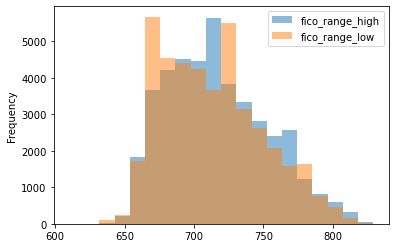

In [106]:
df2[fico_columns].plot.hist(alpha=0.5,bins=20)

In [107]:
# Powyższy wykres pokazuje najwyższe oraz najniże wartości wskaźnika fico_range. Nas potrzeby modelu poszukam średniej wartości dla fico_range z tego przedziału.

In [108]:
df2['fico_average'] = (df2['fico_range_high'] + df2['fico_range_low']) / 2

In [109]:
cols = ['fico_range_low','fico_range_high','fico_average']

In [110]:
df2[cols].head()

fico_range_low  fico_range_high  fico_average
0           735.0            739.0         737.0
1           740.0            744.0         742.0
2           735.0            739.0         737.0
3           690.0            694.0         692.0
4           695.0            699.0         697.0

In [111]:
drop_cols = ['fico_range_low','fico_range_high','last_fico_range_low', 'last_fico_range_high']

In [112]:
df2= df2.drop(drop_cols, axis=1)

In [113]:
df2.shape

(42535, 35)

In [114]:
# Po przeanalizowaniu wszystkich kolumn, udało się zmniejszyć liczbę danych bez utraty danych ważnych przy tworzeniu modelu.

In [115]:
# Jak zostało wspomniane wcześniej celem modelu jest przewidzenie, kyczkobiorca spłaci pożyczkę, a kto nie, musszę wybrać kolumnę, która będzie to odzwierciedlać.
# Z opisu w 'LCDataDictionary' oraz po analizie wszystkich kolumn  wiadomo, że kolumna która na to wskazuje nazywa się 'loan_status'.

In [116]:
# Kolumna 'loan_status' zawiera dane w formie tekstowej, żeby można było użyć danych do utworzenia modely, muszą zostać zamienione na dane numeryczne.
# Użyję metody value_counts() żeny wyświetlić częstotliwość powtarzających się dancy z kolumny 'loan_status'.

In [117]:
df2["loan_status"].value_counts()

Fully Paid                                             34116
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Name: loan_status, dtype: int64

In [118]:
# Kolumna 'loan_status' zawiera 4 różne statusy. Na stonie Lending Club można przeczytać co oznaczają statusy:
# 'Fully Paid' - pożyczka spłacona
# 'Charged off' - pożczka, dla której nie oczekuje się dalszych wpłat
# 'Doesn't meet the credit policy. Status:Fully Paid' - pożyczka spłacona, aktualnie nie można wnioskować o pożyczkę
# 'Doesn't meet the credit policy. Status:Charged Off' - pożyczka dla której nie oczekuje się dalszych wpłat, aktualnie nie można wnioskować o pożyczkę.

# Ze wszystkich statusów, jedynie 'Fully Paid' i 'Charged off' opisują końcowy stan spłacenia pożyczki, pozostałe dane muszą sostać pominięty w modelu.
# Dla potrzeb zbudowania modelu oznaczymy że wartości 'Fully Paid' jako '1', natomiast wartośco 'Charged Off' jako '0'.


In [119]:
df2 = df2[(df2["loan_status"] == "Fully Paid") |

(df2["loan_status"] == "Charged Off")]

mapping_dictionary = {"loan_status":{ "Fully Paid": 1, "Charged Off": 0}}

df2 = df2.replace(mapping_dictionary)

In [120]:
# W zbiorze dancyh mogę znajdować się kolumny z więcej niż jedną powtarzającą się wartością, ale zawierające znaczącą przewagę powtarzającej się wartości.
# Wyszukam teraz i usunę kolumny, które zawierają jednakowe wartości występujące mniej niż 4 razy.


In [132]:
for col in df2.columns:
    if (len(df2[col].unique()) < 4):
        print(df2[col].value_counts())


 36 months    29096
 60 months    10690
Name: term, dtype: int64
Not Verified       16926
Verified           12844
Source Verified    10016
Name: verification_status, dtype: int64
1    34116
0     5670
Name: loan_status, dtype: int64
N    39636
Y      150
Name: debt_settlement_flag, dtype: int64


In [133]:
# Nie mamy tutaj wartości, które moglobyśmy usunąć.